In [1]:
from getdist import plots,loadMCSamples
import matplotlib.pyplot as plt
plt.style.use('Minh_paper_style')
import matplotlib
import matplotlib.cm
from matplotlib.ticker import (FixedLocator, MultipleLocator, FixedFormatter, FormatStrFormatter,
                               AutoMinorLocator)

fig_path=r'/cobra/u/minh/Beyond2ptMock/results/figs/'
analysis_settings_default = {'ignore_rows': '0.3', 'converge_test_limit': '0.95'}
analysis_settings_alternative = {'ignore_rows': '0.1', 'converge_test_limit': '0.95',\
                                 'smooth_scale_1D': '0.7', 'smooth_scale_2D': '0.7'}
analysis_settings=[analysis_settings_default,analysis_settings_alternative]
g=plots.get_single_plotter(analysis_settings=analysis_settings_default)
g.settings.figure_legend_frame = False
g.settings.legend_colored_text = True
g.settings.alpha_filled_add=1.0
g.settings.norm_1d_density=True
g.settings.title_limit_fontsize=24
g.settings.legend_fontsize=18
g.settings.legend_frame=False
g.settings.legend_frac_subplot_margin=0.0
g.settings.axes_fontsize=18
g.settings.axes_labelsize=18
cmap=matplotlib.cm.get_cmap('viridis')
g.settings.colormap_scatter=cmap
redpink='#f1006d'

<Figure size 600x450 with 0 Axes>

In [14]:
chain_param_path='/cobra/ptmp/minh/lefty_challenge/flatLCDM/box1/sampling_bO/Eulerian_NUFFT/twolptthird_nufft/kmax015/'
chain_prefix=['chain1_fixed_highsigma/sampling_bO_2lptthird_nufft_FOURIER_NGEul1024_L0.21_cube_logP_params','chain1/sampling_bO_2lptthird_nufft_FOURIER_NGEul1024_L0.21_cube_logP_params']

fixedic_chains=[]
for chain in chain_prefix:
    fixedic_chains.append(loadMCSamples(chain_param_path+chain,settings=analysis_settings[1]));
#fixedic_chains.append(loadMCSamples(chain_param_path+chain_prefix[0],settings=analysis_settings[0]));
#fixedic_chains.append(loadMCSamples(chain_param_path+chain_prefix[1],settings=analysis_settings[1]));

In [15]:
convergence_test=fixedic_chains[0].getConvergeTests(feedback=True)

Number of chains used =  2
 var(mean)/mean(var), remaining chains, worst e-value: R-1 =       0.17913
RL: Thin for Markov:  10
RL: Thin for indep samples:   79
RL: Estimated burn in steps:  390  ( 390  rows)


In [16]:
print(convergence_test)

Parameter autocorrelation lengths (effective number of samples N_eff = tot weight/weight length)

                Weight Length   Sample length           N_eff
alpha                1.94E+01           19.40             795
b_K2                 5.36E+01           53.62             287
b_K3                 9.46E-01            0.95           16311
b_Otd                9.93E-01            0.99           15532
b_delta              2.81E+01           28.09             548
b_deltaK^2           9.36E-01            0.94           16485
b_delta^2            3.87E+01           38.72             398
b_delta^3            9.22E-01            0.92           16735
b_lapl(delta)        9.94E-01            0.99           15508


mean convergence stats using remaining chains
param sqrt(var(chain mean)/mean(chain var))

alpha             0.0836  \alpha
b_K2              0.0642  b_{K^2}
b_K3              0.3395  b_{K^3}
b_Otd             0.1194  b_{\mathrm{Otd}}
b_delta           0.0348  b_\delta
b_deltaK^2

In [17]:
print(fixedic_chains[0]['alpha'].mean())
print(fixedic_chains[0]['alpha'].std())
print(fixedic_chains[1]['alpha'].mean())
print(fixedic_chains[1]['alpha'].std())

0.8986544248575766
0.0011690173656312935
0.8987752855260911
0.0005630297860198001


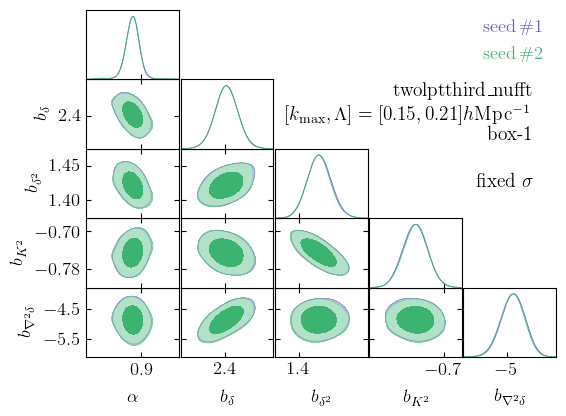

In [13]:
param_list = ['alpha','b_delta','b_delta^2','b_K2','b_lapl(delta)']
#param_list = ['alpha','b_delta','b_delta2','b_K2','b_lapl_delta','sigma']
#labels=['$\hat{s}=\hat{s}_{\mathrm{true}}$','Free $\hat{s}$']
#g.triangle_plot([fixedic_chains,freeic_trueicinit_chains],contour_colors=['royalblue','orangered'],params=param_list,colorbar=False,legend_ncol=1,legend_loc='upper right',legend_labels=labels,filled=True,shaded=False,alpha=0.25)
#labels=['fixed $\sigma$','free $\sigma$']
labels=['seed\,\#1','seed\,\#2']
#labels=[['default'],[r'smoother']]
g.triangle_plot(fixedic_chains,contour_colors=['slateblue','mediumseagreen'],params=param_list,colorbar=False,legend_ncol=1,legend_loc='upper right',legend_labels=labels,filled=True,shaded=False,alpha=[1.0,1.0])
#g.triangle_plot(fixedic_chains[0],contour_colors=contour_colors[0],params=param_list,colorbar=False,legend_ncol=1,legend_loc='upper right',legend_labels=labels[0],filled=True,shaded=False,alpha=1.)
g.add_text(r'twolptthird\_nufft'+'\n'+'$[k_{\mathrm{max}},\Lambda]=[0.15,0.21]h$Mpc$^{-1}$'+'\n'+'box-1',0.75, 3.5, color='k',fontsize=14)
g.add_text(r'fixed $\sigma$',0.75, 2., color='k',fontsize=14)
g.fig.set_facecolor('white')
#for ax in g.subplots[:,0]:
        #ax.set_yticks([])
#for ax in g.subplots[-1,:]:
        #ax.set_xticks([])
fig_name='fixedICs_box1_twolptthird_nufft_lambda021_kmax015_chain1-2_fixed_vs_free_sigma.pdf'
g.fig.savefig(fig_path+fig_name)

In [ ]:
print(fixedic_chains[0]['b_delta'].mean())

In [ ]:
print(fixedic_chains[0]['alpha'].mean())
print(fixedic_chains[0]['alpha'].std())
print(fixedic_chains[0]['b_delta'].mean())
print(fixedic_chains[0]['b_delta2'].mean())
print(fixedic_chains[0]['b_K2'].mean())
print(fixedic_chains[0]['b_lapl_delta'].mean())
print(fixedic_chains[0]['sigma'].mean())

In [ ]:
param_list = ['alpha','b_delta','b_lapl_delta','b_sigmasigma','b_trM1M1','sigma','sigmaEpsk2']
#labels=['$\hat{s}=\hat{s}_{\mathrm{true}}$','Free $\hat{s}$']
#g.triangle_plot([fixedic_chains,freeic_trueicinit_chains],contour_colors=['royalblue','orangered'],params=param_list,colorbar=False,legend_ncol=1,legend_loc='upper right',legend_labels=labels,filled=True,shaded=False,alpha=0.25)
labels=['Free $\hat{s}$']
g.triangle_plot([freeic_trueicinit_chains],contour_colors=['orangered'],params=param_list,colorbar=False,legend_ncol=1,legend_loc='upper right',legend_labels=labels,filled=True,shaded=False,alpha=0.25)
#for ax in g.subplots[:,0]:
        #ax.set_xticks([])
        #ax.set_yticks([])
#for ax in g.subplots[-1,:]:
        #ax.set_xticks([])
        #ax.set_yticks([])

In [ ]:
# Specify the input and output file paths
input_files = []
output_files = []
for chain in chain_prefix:
    input_files.append(chain_param_path+chain+'.1.txt')
    output_files.append(chain_param_path+chain+'_include_norm_As.1.txt')

# Specify the scalar value for multiplication
As_fid = 2.1e-9

# Open the input file for reading
with open(input_file, 'r') as file:
    # Open the output file for writing
    with open(output_file, 'w') as output:
        # Iterate through each line in the input file
        for line in file:
            # Split the line into columns
            columns = line.split()

            # Multiply the value in column 3 with the scalar
            multiplied_value = float(columns[2]) * scalar

            # Insert the product as a new column between column 2 and 3
            columns.insert(2, str(multiplied_value))

            # Write the modified line to the output file
            output.write('\t'.join(columns) + '\n')

# Print a message indicating successful completion
print("File processing complete.")